In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../data/heart_2020_cleaned.csv


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde, gaussian_kde
from matplotlib import gridspec

In [3]:
df_hd = pd.read_csv(os.path.join(dirname, filename))

In [4]:
df_hd.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


# 1. Data Understanding

#### Before, we do the classification, we first understand concep the data so we can answer the conflicts in data and have better data prepration

First, we need to see the unique value of each features, most of features are binary data, discrete data and one feature is continous data (BMI)

In [5]:
for feature in df_hd.columns:
    print(feature)
    print(df_hd[feature].unique(),"\n")

HeartDisease
['No' 'Yes'] 

BMI
[16.6  20.34 26.58 ... 62.42 51.46 46.56] 

Smoking
['Yes' 'No'] 

AlcoholDrinking
['No' 'Yes'] 

Stroke
['No' 'Yes'] 

PhysicalHealth
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.] 

MentalHealth
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.] 

DiffWalking
['No' 'Yes'] 

Sex
['Female' 'Male'] 

AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity
['Yes' 'No'] 

GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

SleepTime
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.] 

Asthma
['Yes' 'No'] 


In [6]:
df_hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

#### This data contain only non-null values, so the data is remove an missing data already

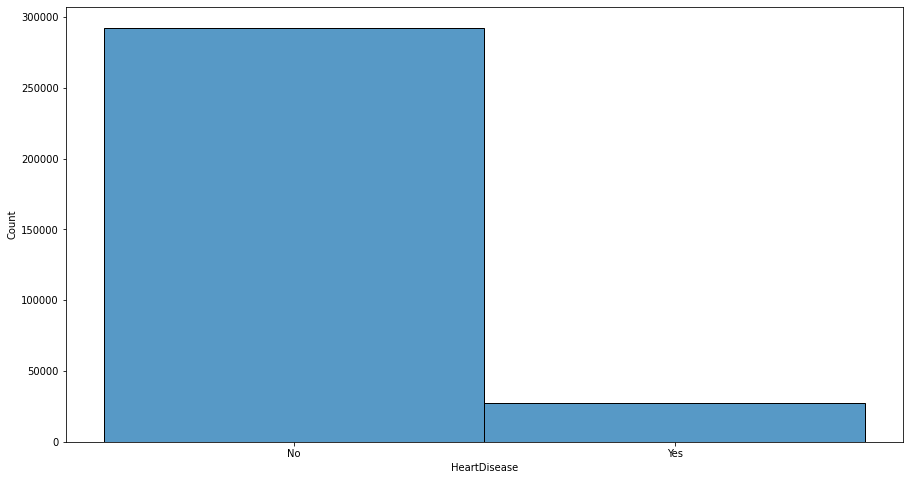

In [7]:
fig,axes = plt.subplots(figsize=(15,8))
sns.histplot(ax=axes,data = df_hd.HeartDisease)
plt.show()

We gain from the histogram is most people come frome Heart Disease but we want to see the percentile of people who have Heart Disease so we calculate it

In [8]:
No_Value = df_hd.HeartDisease.value_counts()[0]
Yes_Value = df_hd.HeartDisease.value_counts()[1]
print("The number of Yes Value has {}%".format(((Yes_Value/len(df_hd))*100).round(2)))

The number of Yes Value has 8.56%


### => The data of people who have heart disease has only 8.56% in the dataset. This brings the unbalanced data problems

# 1. 1. Data Visualization

#### Data Visualization divided into three kind of visualization, the binary data and discrete data and continous data

In [9]:
features = df_hd.columns

In [10]:
features

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [11]:
# Take out all features is binary data (Yes, No) and (Male, Female)
binary_feature = []

for feature in df_hd.columns:
    if np.isin(df_hd[feature].unique(),["Yes","No"]).all() or np.isin(df_hd[feature].unique(),["Male","Female"]).all():
        binary_feature.append(feature)

/usr/local/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [12]:
# Take out all features is continuous data
continuos_feature = ["BMI"]

In [13]:
# Take out all features is discrete data
discrete_feature = features[~features.isin(binary_feature+continuos_feature)]

### 1. 1. 1. Binary data

For Binary data, I choose the pie chart because I want to explore the binary data in people who have heart disease and who not have heart disease

In [14]:
df_hd[binary_feature].head(5)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,Yes,Yes,No,Yes
1,No,No,No,Yes,No,Female,Yes,No,No,No
2,No,Yes,No,No,No,Male,Yes,Yes,No,No
3,No,No,No,No,No,Female,No,No,No,Yes
4,No,No,No,No,Yes,Female,Yes,No,No,No


In [15]:
# Create the function to visualize to pie chart
def Draw_pie_chart(name_feature):

    fig,axes = plt.subplots(1,2,figsize=(15,8))
    labels = df_hd[name_feature].unique()
    textprops = {"fontsize":15}

    axes[0].pie(df_hd[df_hd.HeartDisease=="No"][name_feature].value_counts(), labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[0].set_title('No Heart Disease',fontsize=15)
    axes[1].pie(df_hd[df_hd.HeartDisease=="Yes"][name_feature].value_counts(), labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[1].set_title('Yes Heart Disease',fontsize=15)

    plt.legend(title = name_feature, fontsize=15, title_fontsize=15)
    plt.show()

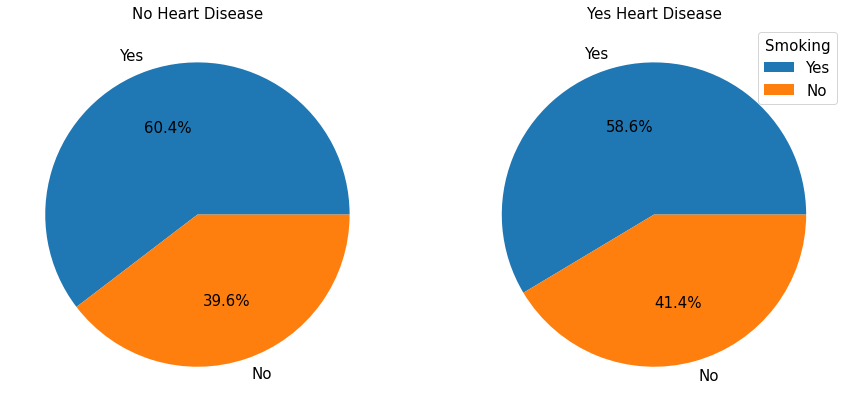

In [16]:
Draw_pie_chart("Smoking")

As I explore before, this is the unbalanced data because there only 8.56% people who have Heart Disease. However, in these two pie chart, the ratio between who have Smoking and who not Smoking in Heart Disease and No Heart Disease is the same. Most people who at least smoking 100 cigarettes still not get Heart Disease but also, people have Heart Disease also smoking 100 cigarettes. So does this mean the Smoking not affect to Heart Disease or there are something different in people smoking between two piechart

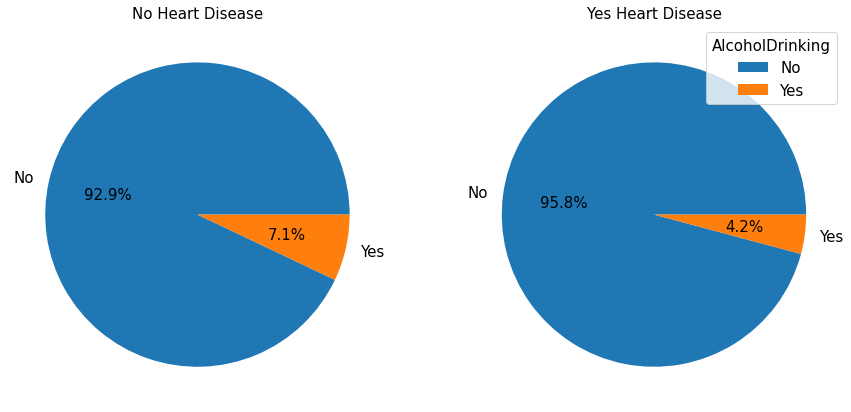

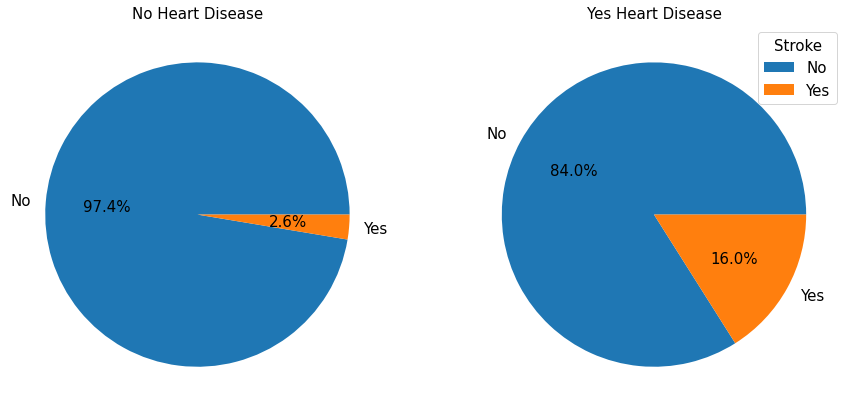

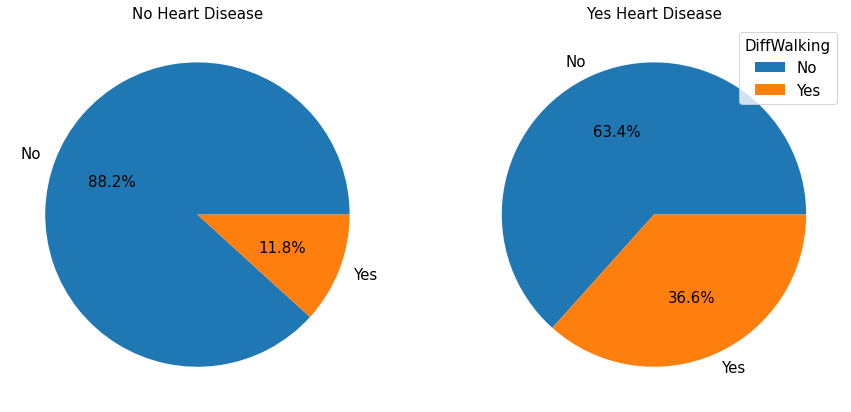

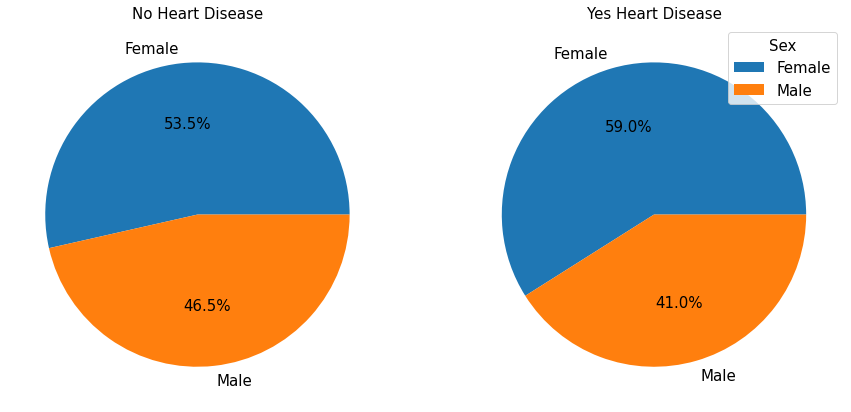

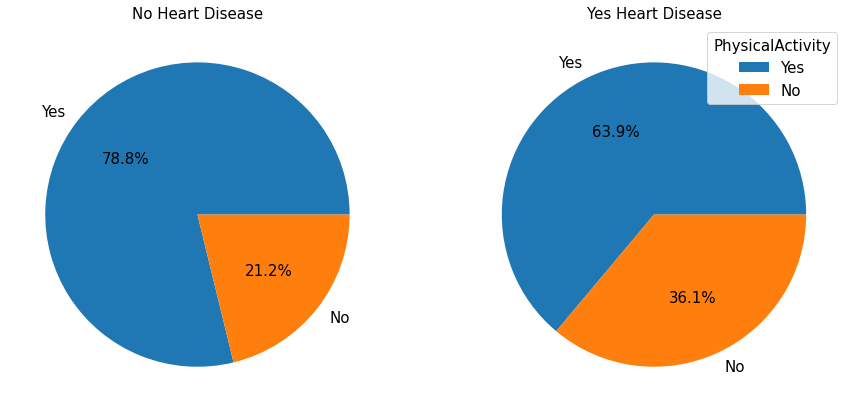

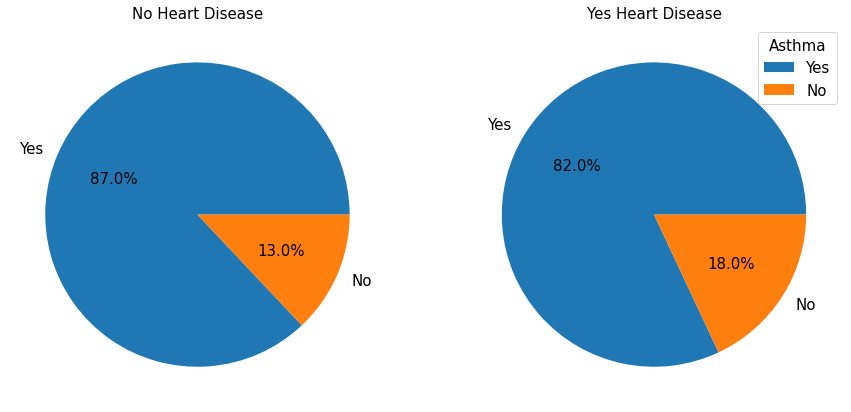

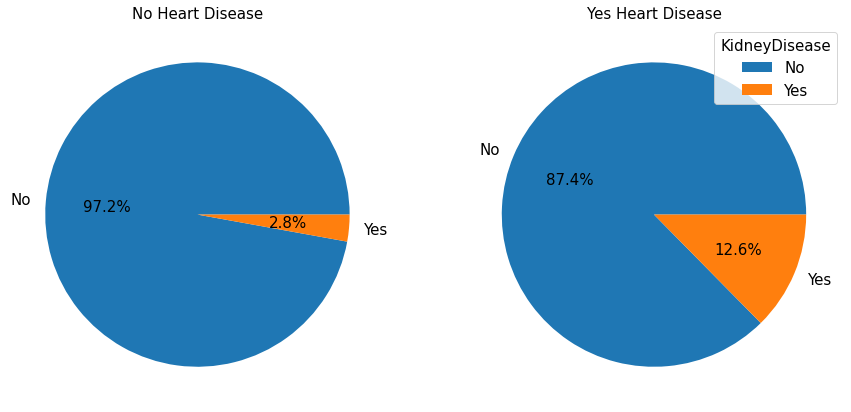

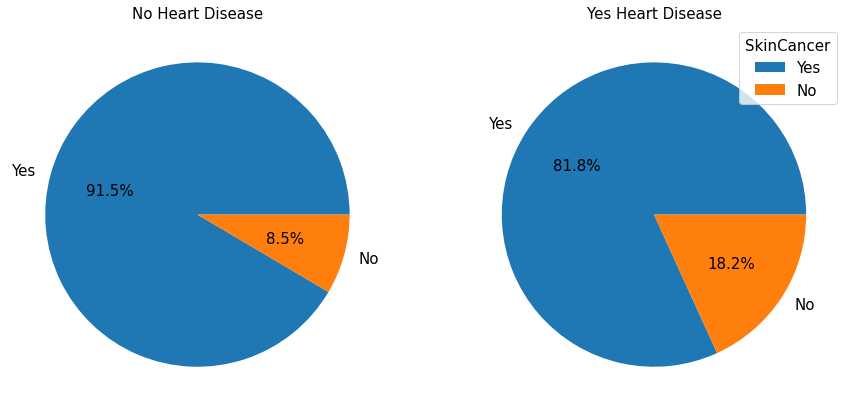

In [17]:
for feature in binary_feature[2:]:
    Draw_pie_chart(feature)

After visualize Pie Chart, we can see features like Stroke, DiffWalking, Physical Activity Kidney Disease and Skin Cancer affect most people who have Heart Disease than people who don't have Heart Disease. We can clearly see the distinguish ratio between two pie chart in these features. **For example in Stroke Pie Charts we see 16% people who have Heart Disease (Ever told)(had) a stroke meanwhile the number in who don't have Heart Disease kind of small, only 2.6%. This very helpful feature when we want to predict Heart Disease or Not**. 

### 1. 1. 2. Discrete data

In [18]:
df_hd[discrete_feature].head(5)

,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime
0,3.0,30.0,55-59,White,Yes,Very good,5.0
1,0.0,0.0,80 or older,White,No,Very good,7.0
2,20.0,30.0,65-69,White,Yes,Fair,8.0
3,0.0,0.0,75-79,White,No,Good,6.0
4,28.0,0.0,40-44,White,No,Very good,8.0


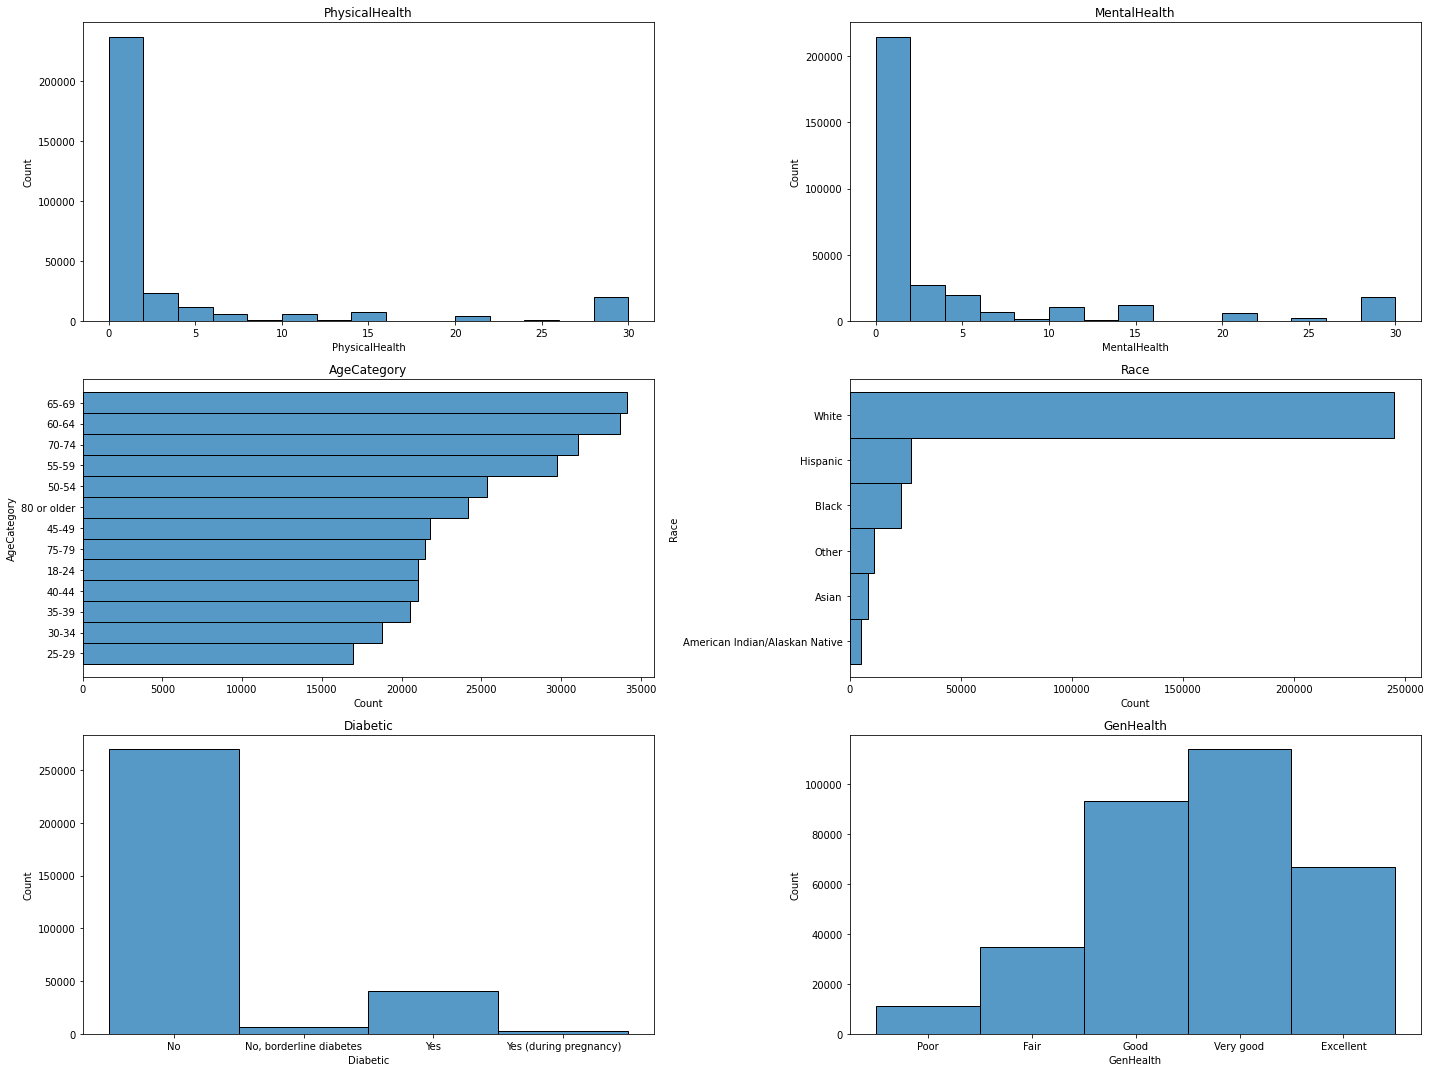

In [19]:
position_index = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]
fig,axes = plt.subplots(3,2,figsize=(20,15))
for position, feature in zip(position_index, discrete_feature):
    if len(df_hd[feature].unique()) > 15:
        sns.histplot(ax=axes[position],bins = 15, data=df_hd[feature].sort_values())
    else:
        if feature in ["AgeCategory", "Race"]:
            i, r = pd.factorize(df_hd[feature])
            a = np.argsort(np.bincount(i)[i], kind='mergesort')[::-1]
            sns.histplot(ax=axes[position],y=df_hd.iloc[a][feature])
        elif feature == "GenHealth":
            sns.histplot(ax=axes[position],data=pd.Categorical(df_hd.GenHealth, categories=["Poor","Fair","Good","Very good","Excellent"], ordered=True))
            axes[position].set(xlabel=feature)
        else:
            sns.histplot(ax=axes[position],data=df_hd[feature].sort_values())
    axes[position].set_title(feature)
        
fig.tight_layout()
plt.show()

When we visualize AgeCategory and Race, we want the histogram as horizontal than vertical. The reason is bars in vertical histogram text take a lot of space so we flip the x to y so the histogram displays as horizontal. As a result, the figure labels easy to read and not overlap each other. However, one draw back of horizontal histogram is it has to sorted by count rather than labels, the unsorted horizontal histogram take more time to read and compare each labels so it's confusing and less intuitive than sorted horizontal histogram. Another problem, is the GenHealth consider as Ordinal data so we have to sort by level, not alphabet.

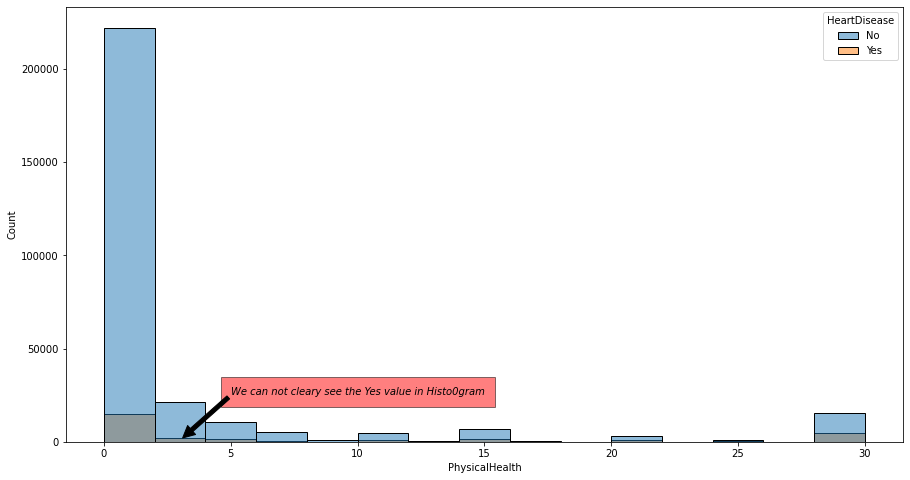

In [21]:
fig,axes = plt.subplots(figsize=(15,8))
sns.histplot(ax=axes,bins =15, data=df_hd.sort_values(by="PhysicalHealth"), x="PhysicalHealth", hue="HeartDisease")
axes.text(5, 25000, 'We can not cleary see the Yes value in Histo0gram', style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
axes.annotate("",xy=(3, 843), xytext=(5, 25000),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

#### The main problem here is we also want to see the distributed of discrete features in Heart Disease and No Heart Disease as we do for binary data. We can try plot hisogram with hue is Heart Disease but when we try for Physical Health, it not good solution because Heart Disease take only 8.56% so it hard to visualize along with No Heart Disease. This chart proves more about theunbalanced data in our data

### 1. 1. 3. Continous data

In [22]:
def draw_density_plot(name_feature):
    fig,axes = plt.subplots(figsize=(15,8))
    sns.kdeplot(ax=axes,data=df_hd, x=continuos_feature[0], hue=name_feature,fill=True,bw_adjust=.8)
    plt.show()

In [23]:
# We only take categorical and discrete feature
combine_features = features[~features.isin(continuos_feature)]

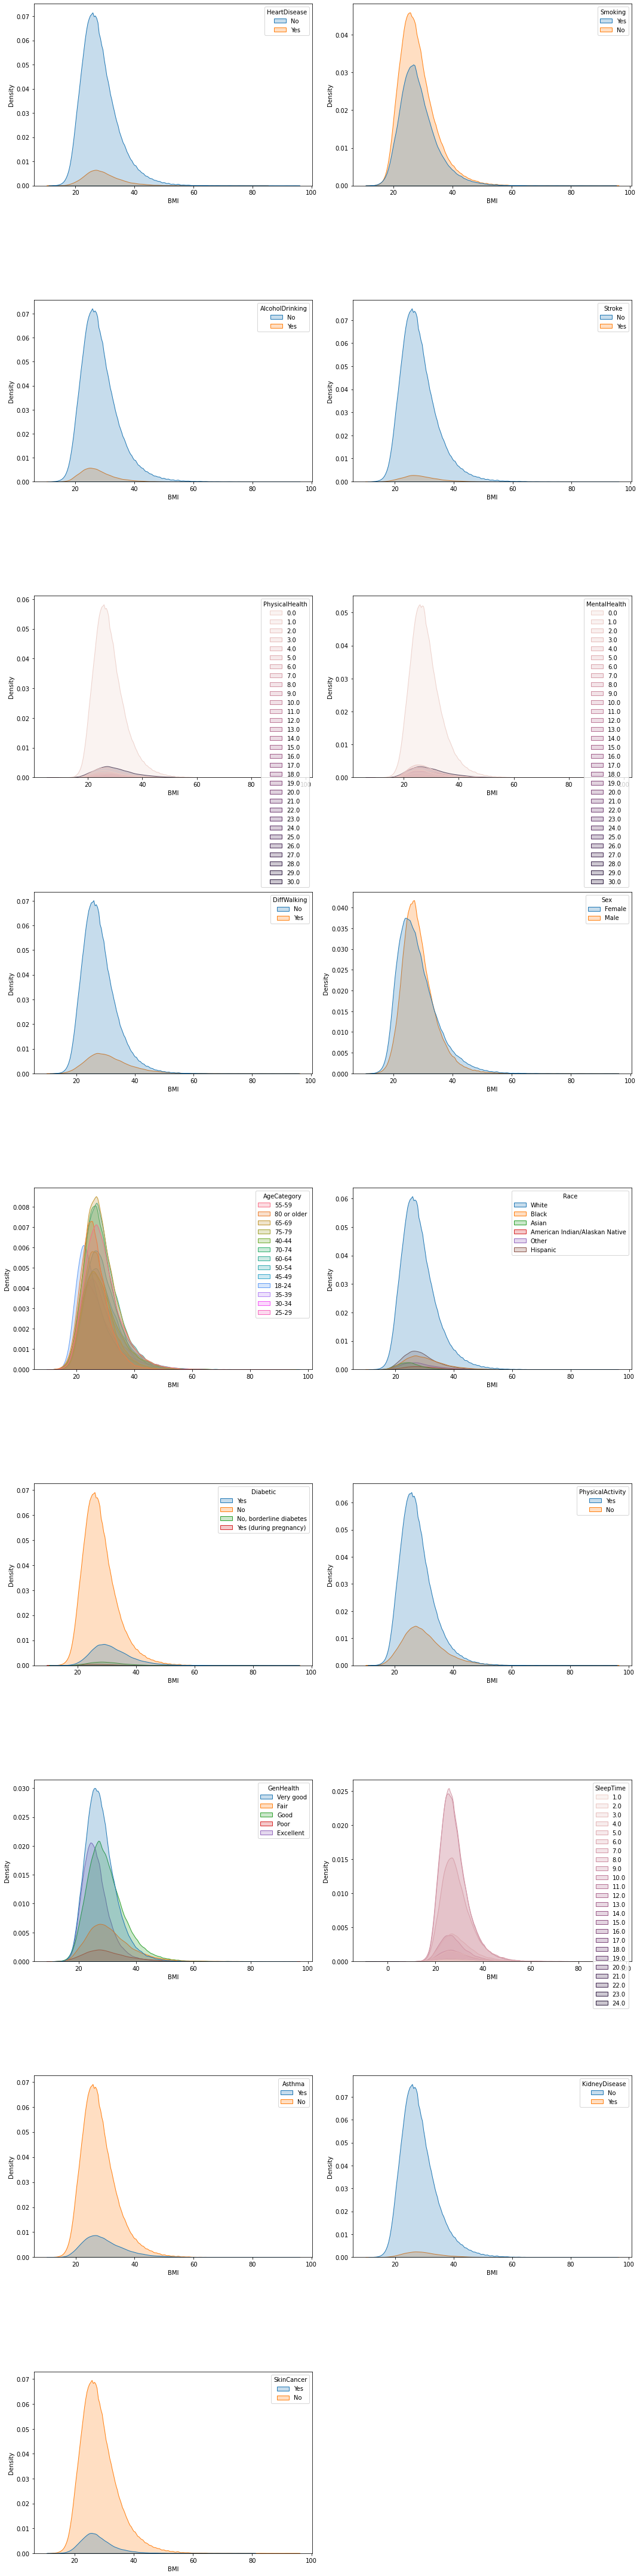

In [24]:
nrows, ncols = 9, 2

fig = plt.figure(figsize=(15,60))    
for position, name_feature in zip(range(1,18),combine_features):
    axes = fig.add_subplot(nrows, ncols, position)
    sns.kdeplot(ax=axes,data=df_hd, x=continuos_feature[0], hue=name_feature,fill=True,bw_adjust=.8)
    
fig.tight_layout()
plt.show()

# 1.2 Data Selection

#### Before we process data selection, we need to transform categorical data to numeric data for correlation and covariance. As you can see below, only 4 features in data heart disease can correlated each other. This because these data is numeric type and the other features are defined as object/string.

In [25]:
df_hd.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


Our classification is predict whether a person has Heart Disease or not, so we need to see the relationship between our predict feature, Heart Disease and other features. As a result, we can remove unimportant features and keep features have high correlate and positive covariance to the Heart Disease. 
<br>Our temporary method to convert categorical to numeric is **OrdinalEncoder**, we want to try **OneHotEncoder** which each categorical feature will convert to binary feature. For example, Smoking feature will be divided two feature columns: Yes Smoking(0-No,1-Yes) and No Smoking(0-Yes, 1-No). However, it will take a lot of space and increase the features, like the AgeCategory feature will be divided 13 feature columns and sum up all features after OneHotEncoder is 51 columns (Noted: Heart Disease is our predict feature so we convert it by **OrdinalEncoder**).
<br>This huge number of features can be reduced by Dimensionality Reduction but it should be removed unrelated features before going to reduce the dimension. So we stay with **OrdinalEncoder** and then to **OneHotEncoder**

### 1.2.1 Handle categorical data

In [26]:
def plot_bar_chart(df1, df2, maintitle="Main title", title1='Before Normialization',title2='After Normialization'):
    fig,axes = plt.subplots(1,2,figsize=(15,8))

    axes[0].barh(df1.index, df1.values)
    axes[0].set_title(title1)
    axes[0].invert_yaxis()
    
    axes[1].barh(df2.index,df2.values)
    axes[1].set_title(title2)
    axes[1].invert_yaxis()
    
    fig.suptitle(maintitle, fontsize=15)
    
    fig.tight_layout()
    plt.show()

In [27]:
# Define 2 array contain features are categorical type(include Heart Disease feature) and numeric type
cat_features = []
num_features = []
for column, i in zip(df_hd.columns, df_hd.dtypes):
    if i == object:
        cat_features.append(column)
    else:
        num_features.append(column)

In [28]:
df_cat = df_hd[cat_features].copy()

In [29]:
df_cat.head(3)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No


### Ordinal Encoder

In [30]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns = cat_features)

In [31]:
df_cat_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  float64
 1   Smoking           319795 non-null  float64
 2   AlcoholDrinking   319795 non-null  float64
 3   Stroke            319795 non-null  float64
 4   DiffWalking       319795 non-null  float64
 5   Sex               319795 non-null  float64
 6   AgeCategory       319795 non-null  float64
 7   Race              319795 non-null  float64
 8   Diabetic          319795 non-null  float64
 9   PhysicalActivity  319795 non-null  float64
 10  GenHealth         319795 non-null  float64
 11  Asthma            319795 non-null  float64
 12  KidneyDisease     319795 non-null  float64
 13  SkinCancer        319795 non-null  float64
dtypes: float64(14)
memory usage: 34.2 MB


We need to check the unique value after transformation, as below all categorical data, Yes and No are convert to 0 and 1. For data like Age Category, it convert to numbers.

In [69]:
from pprint import pprint

In [72]:
for feature in df_cat_encoded.columns:
    pprint(feature)
    print(df_cat_encoded[feature].unique(),"\n")

'HeartDisease'
[0. 1.] 

'Smoking'
[1. 0.] 

'AlcoholDrinking'
[0. 1.] 

'Stroke'
[0. 1.] 

'DiffWalking'
[0. 1.] 

'Sex'
[0. 1.] 

'AgeCategory'
[ 7. 12.  9. 11.  4. 10.  8.  6.  5.  0.  3.  2.  1.] 

'Race'
[5. 2. 1. 0. 4. 3.] 

'Diabetic'
[2. 0. 1. 3.] 

'PhysicalActivity'
[1. 0.] 

'GenHealth'
[4. 1. 2. 3. 0.] 

'Asthma'
[1. 0.] 

'KidneyDisease'
[0. 1.] 

'SkinCancer'
[1. 0.] 



The **OrdinalEncoder** does a good job at convert categorical to numeric especially the order. As you can see the unique value of each categorical features not have the order. For instance, AlcoholDrinking, Stroke, DiffWalking and KidneyDisease have ["No", "Yes"] meanwhile the others is ["Yes", "No"]. So we expected that OrdinalEncoder mistake 1 for No and 0 for Yes instead 0 for No and 1 for Yes. But the OrdinalEncoder has the consistency in define Yes to 1 and No to 0 for all Yes-No features.
<br>Next step, we merge new dataframe with numeric feature to create new numeric dataframe

In [33]:
df_numeric = pd.merge(df_cat_encoded, df_hd[num_features],left_index=True, right_index=True)

In [34]:
df_numeric.head(10)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,1.0,0.0,1.0,16.60,3.0,30.0,5.0
1,0.0,0.0,0.0,1.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,20.34,0.0,0.0,7.0
2,0.0,1.0,0.0,0.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0,26.58,20.0,30.0,8.0
3,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,0.0,0.0,1.0,24.21,0.0,0.0,6.0
4,0.0,0.0,0.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,23.71,28.0,0.0,8.0
5,1.0,1.0,0.0,0.0,1.0,0.0,11.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,28.87,6.0,0.0,12.0
6,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,0.0,1.0,1.0,1.0,0.0,1.0,21.63,15.0,0.0,4.0
7,0.0,1.0,0.0,0.0,1.0,0.0,12.0,5.0,2.0,0.0,2.0,1.0,0.0,0.0,31.64,5.0,0.0,9.0
8,0.0,0.0,0.0,0.0,0.0,0.0,12.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,26.45,0.0,0.0,5.0
9,0.0,0.0,0.0,0.0,1.0,1.0,9.0,5.0,0.0,1.0,2.0,0.0,0.0,0.0,40.69,0.0,0.0,10.0


### Correlation

In [35]:
corr_matrix = df_numeric.corr()
corr_matrix

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
HeartDisease,1.000000,0.107764,-0.032080,0.196835,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.041444,0.145197,0.093317,0.051803,0.170721,0.028591,0.008327
Smoking,0.107764,1.000000,0.111768,0.061226,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,0.024149,0.034920,0.033977,0.023118,0.115352,0.085157,-0.030336
AlcoholDrinking,-0.032080,0.111768,1.000000,-0.019858,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.002202,-0.028280,-0.005702,-0.038816,-0.017254,0.051282,-0.005065
Stroke,0.196835,0.061226,-0.019858,1.000000,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.038866,0.091167,0.048116,0.019733,0.137014,0.046467,0.011900
DiffWalking,0.201258,0.120074,-0.035328,0.174143,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,0.103222,0.153064,0.064840,0.181678,0.428373,0.152235,-0.022216
Sex,0.070040,0.085052,0.004200,-0.003091,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.069191,-0.009084,0.013434,0.026940,-0.040904,-0.100058,-0.015704
AgeCategory,0.233432,0.128331,-0.059528,0.137822,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,-0.058108,0.123190,0.263537,-0.004744,0.110763,-0.155506,0.104953
Race,0.034854,0.065499,0.036702,-0.003956,-0.015831,0.018855,0.163090,1.000000,-0.052216,0.056767,0.050344,-0.017975,0.003709,0.134780,-0.037424,-0.000847,-0.014491,0.035889
Diabetic,0.168553,0.053847,-0.057372,0.101518,0.205502,-0.013456,0.193745,-0.052216,1.000000,-0.133824,-0.010854,0.049827,0.142917,0.032523,0.202472,0.151361,0.032945,0.000449
PhysicalActivity,-0.100030,-0.097174,0.017487,-0.079455,-0.278524,0.048247,-0.121687,0.056767,-0.133824,1.000000,0.024418,-0.041526,-0.081827,-0.001328,-0.150616,-0.232283,-0.095808,0.003849


The correlation matrix hard to understand, so we draw heat map to easy intepret. The higher correlation, the brighter cell.

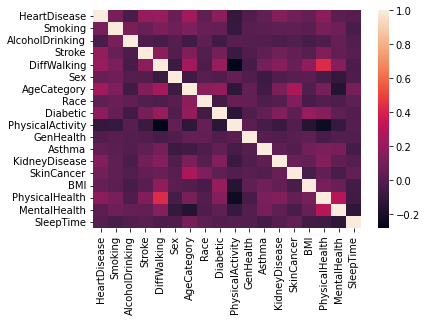

In [36]:
sns.heatmap(corr_matrix)
plt.show()

However, we want to only look at the Heart Disease to see which feature most correlated to Heart Disease, so we take Heart Disease in correlation matrix and sort by descending

In [37]:
corr_matrix["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)

AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
MentalHealth        0.028591
SleepTime           0.008327
GenHealth          -0.011062
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64

#### We see AgeCategory, DiffWalking, Stroke, PhysicalHealth and Diabetic have fair correlation with HeartDiease but we not make sure these should be keep in training so we compare the covariance and see these features are tend to have same behavior with Heart Disease or inverse.

### Covariance

In [38]:
cov_matrix = df_numeric.cov()
cov_matrix

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
HeartDisease,0.078269,0.014842,-0.002261,0.010494,0.019471,0.009786,0.232802,0.011820,0.033786,-0.011679,-0.004749,0.003951,0.007651,0.007591,0.092118,0.379748,0.063632,0.003345
Smoking,0.014842,0.242340,0.013860,0.005744,0.020441,0.020909,0.225203,0.039086,0.018992,-0.019964,0.015582,0.004050,0.003238,0.004864,0.072336,0.451495,0.333494,-0.021445
AlcoholDrinking,-0.002261,0.013860,0.063460,-0.000953,-0.003078,0.000528,-0.053456,0.011208,-0.010355,0.001838,0.000630,-0.000189,-0.001342,-0.000418,-0.062152,-0.034559,0.102770,-0.001832
Stroke,0.010494,0.005744,-0.000953,0.036316,0.011476,-0.000294,0.093626,-0.000914,0.013861,-0.006319,-0.002730,0.002524,0.003272,0.002666,0.023902,0.207599,0.070444,0.003256
DiffWalking,0.019471,0.020441,-0.003078,0.011476,0.119586,-0.011892,0.299879,-0.006636,0.050917,-0.040197,-0.023113,0.012162,0.009970,0.006520,0.399331,1.177809,0.418799,-0.011032
Sex,0.009786,0.020909,0.000528,-0.000294,-0.011892,0.249389,-0.120125,0.011414,-0.004815,0.010055,-0.007881,-0.011773,-0.000854,0.001951,0.085511,-0.162411,-0.397508,-0.011262
AgeCategory,0.232802,0.225203,-0.053456,0.093626,0.299879,-0.120125,12.707509,0.704750,0.494839,-0.181038,0.243044,-0.070577,0.082714,0.273167,-0.107489,3.139345,-4.409903,0.537258
Race,0.011820,0.039086,0.011208,-0.000914,-0.006636,0.011414,0.704750,1.469449,-0.045350,0.028719,0.093656,-0.007424,0.000847,0.047507,-0.288351,-0.008168,-0.139740,0.062473
Diabetic,0.033786,0.018992,-0.010355,0.013861,0.050917,-0.004815,0.494839,-0.045350,0.513344,-0.040016,-0.011934,0.012164,0.019287,0.006776,0.922063,0.862248,0.187778,0.000462
PhysicalActivity,-0.011679,-0.019964,0.001838,-0.006319,-0.040197,0.010055,-0.181038,0.028719,-0.040016,0.174176,0.015639,-0.005905,-0.006432,-0.000161,-0.399536,-0.770771,-0.318090,0.002307


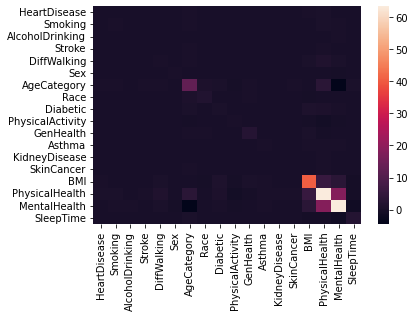

In [39]:
sns.heatmap(cov_matrix)
plt.show()

In [40]:
cov_matrix["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)

PhysicalHealth      0.379748
AgeCategory         0.232802
BMI                 0.092118
MentalHealth        0.063632
Diabetic            0.033786
DiffWalking         0.019471
Smoking             0.014842
Race                0.011820
Stroke              0.010494
Sex                 0.009786
KidneyDisease       0.007651
SkinCancer          0.007591
Asthma              0.003951
SleepTime           0.003345
AlcoholDrinking    -0.002261
GenHealth          -0.004749
PhysicalActivity   -0.011679
Name: HeartDisease, dtype: float64

We hardly compare features between correlation and covariance when just look at the Series. So we plot it with bar plot, we drop Heart Disease before plotting. You can see the problem here, the range of axis is (0,0.2) instead (0,1), that's because the maximum correlation is 0.2 (Quite small) but keeping range (0,0.2) easy to intepret other features than (0,1)

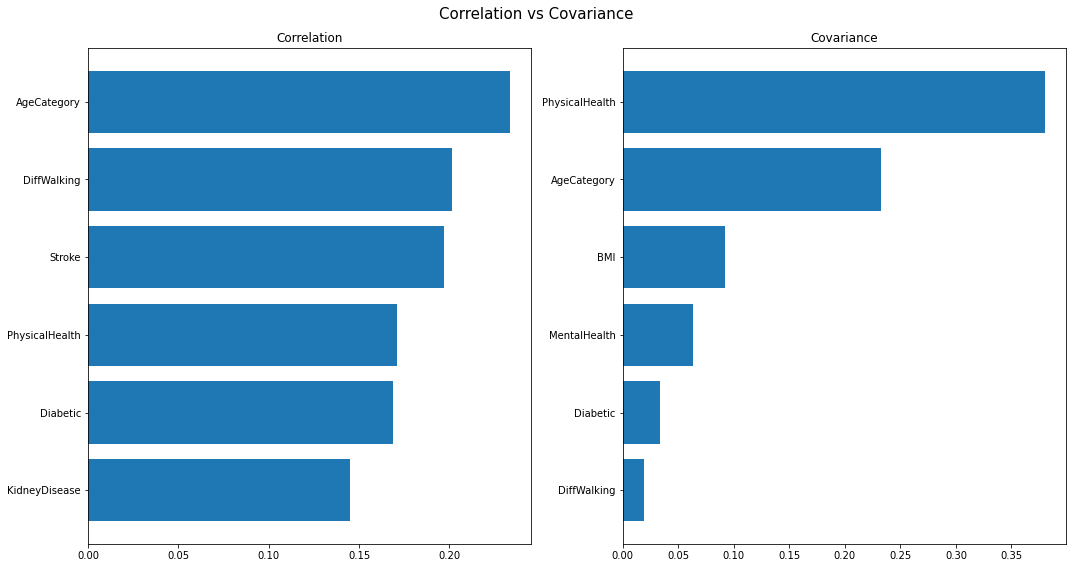

In [41]:
unscaling_cor = corr_matrix["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)[:6]
unscaling_cov = cov_matrix["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)[:6]

plot_bar_chart(unscaling_cor,unscaling_cov,maintitle = "Correlation vs Covariance", title1="Correlation",title2="Covariance")

In the top 5 of highest covariances (exclude Heart Diease), we see BMI is the top 3 but the correlation in top 10, the similar with MentalHealth and Stroke. Meanwhile,PhysicalHealth, AgeCategory, Diabetic, DiffWalking are still in top 6 in both correlation and covariances, especially AgeCategory in top 2 both cases. So we can conclude the AgeCategory has the most affect to Heart Disease. 
<br>Our question that does the Physical Health better than AgeCategory despite it has top 4 correlation but has most high covariance than the other (Only it have covariance above 0.3)?
<br>Maybe it because we not normalize original numeric features (BMI, PhysicalHealth, MentalHealth, SleepTime). Therefore, our next step is normialization which our method is scaling standardization the data by **StandardScaler** library

### 1.2.2 Handle numeric data

### Standardization

In [42]:
from sklearn.preprocessing import StandardScaler
stand_scale = StandardScaler()

In [43]:
df_num = df_hd[num_features].copy()

In [44]:
df_num_scaler = stand_scale.fit_transform(df_num)
df_num_scaler = pd.DataFrame(df_num_scaler, columns = num_features)

In [45]:
df_num_scaler

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,-1.844750,-0.046751,3.281069,-1.460354
1,-1.256338,-0.424070,-0.490039,-0.067601
2,-0.274603,2.091388,3.281069,0.628776
3,-0.647473,-0.424070,-0.490039,-0.763977
4,-0.726138,3.097572,-0.490039,0.628776
...,...,...,...,...
319790,-0.144019,0.456341,-0.490039,-0.763977
319791,0.238291,-0.424070,-0.490039,-1.460354
319792,-0.642753,-0.424070,-0.490039,-0.763977
319793,0.705560,-0.424070,-0.490039,3.414282


In [46]:
df_numeric_scaler = pd.merge(df_cat_encoded, df_num_scaler,left_index=True, right_index=True)

In [47]:
df_numeric_scaler.head(10)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,1.0,0.0,1.0,-1.844750,-0.046751,3.281069,-1.460354
1,0.0,0.0,0.0,1.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,-1.256338,-0.424070,-0.490039,-0.067601
2,0.0,1.0,0.0,0.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0,-0.274603,2.091388,3.281069,0.628776
3,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,0.0,0.0,1.0,-0.647473,-0.424070,-0.490039,-0.763977
4,0.0,0.0,0.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,-0.726138,3.097572,-0.490039,0.628776
5,1.0,1.0,0.0,0.0,1.0,0.0,11.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.085682,0.330568,-0.490039,3.414282
6,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,0.0,1.0,1.0,1.0,0.0,1.0,-1.053383,1.462524,-0.490039,-2.156730
7,0.0,1.0,0.0,0.0,1.0,0.0,12.0,5.0,2.0,0.0,2.0,1.0,0.0,0.0,0.521484,0.204795,-0.490039,1.325152
8,0.0,0.0,0.0,0.0,0.0,0.0,12.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.295055,-0.424070,-0.490039,-1.460354
9,0.0,0.0,0.0,0.0,1.0,1.0,9.0,5.0,0.0,1.0,2.0,0.0,0.0,0.0,1.945316,-0.424070,-0.490039,2.021529


In [48]:
df_numeric_scaler.corr()["HeartDisease"].sort_values(ascending=False)

HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
MentalHealth        0.028591
SleepTime           0.008327
GenHealth          -0.011062
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64

In [49]:
df_numeric_scaler.cov()["HeartDisease"].sort_values(ascending=False)

AgeCategory         0.232802
HeartDisease        0.078269
PhysicalHealth      0.047762
Diabetic            0.033786
DiffWalking         0.019471
Smoking             0.014842
BMI                 0.014493
Race                0.011820
Stroke              0.010494
Sex                 0.009786
MentalHealth        0.007999
KidneyDisease       0.007651
SkinCancer          0.007591
Asthma              0.003951
SleepTime           0.002330
AlcoholDrinking    -0.002261
GenHealth          -0.004749
PhysicalActivity   -0.011679
Name: HeartDisease, dtype: float64

In [50]:
scaling_cor = df_numeric_scaler.corr()["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)[:6]

scaling_cov = df_numeric_scaler.cov()["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)[:6]

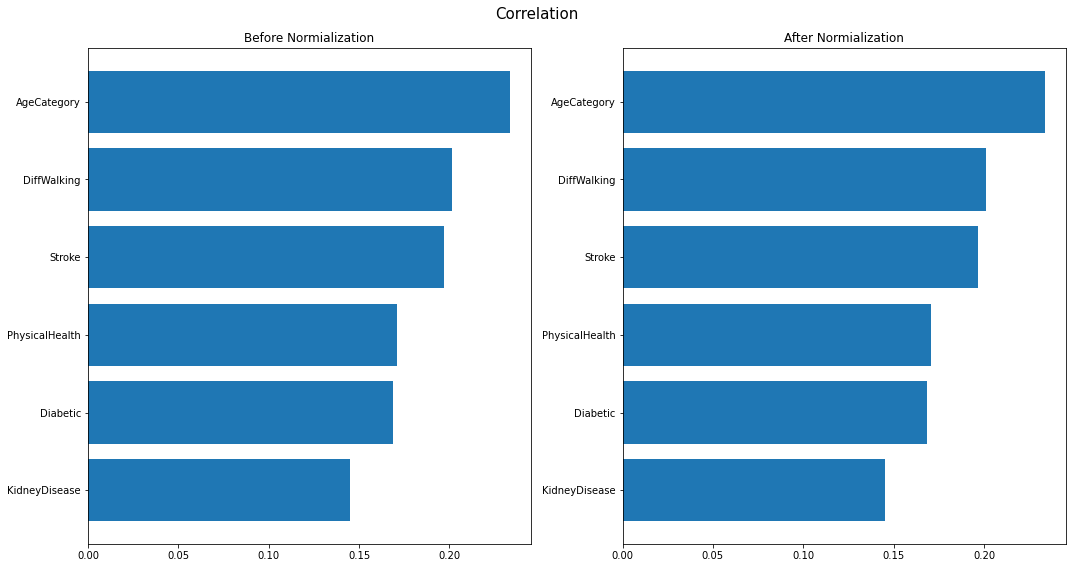

In [51]:
plot_bar_chart(unscaling_cor,scaling_cor, maintitle="Correlation")

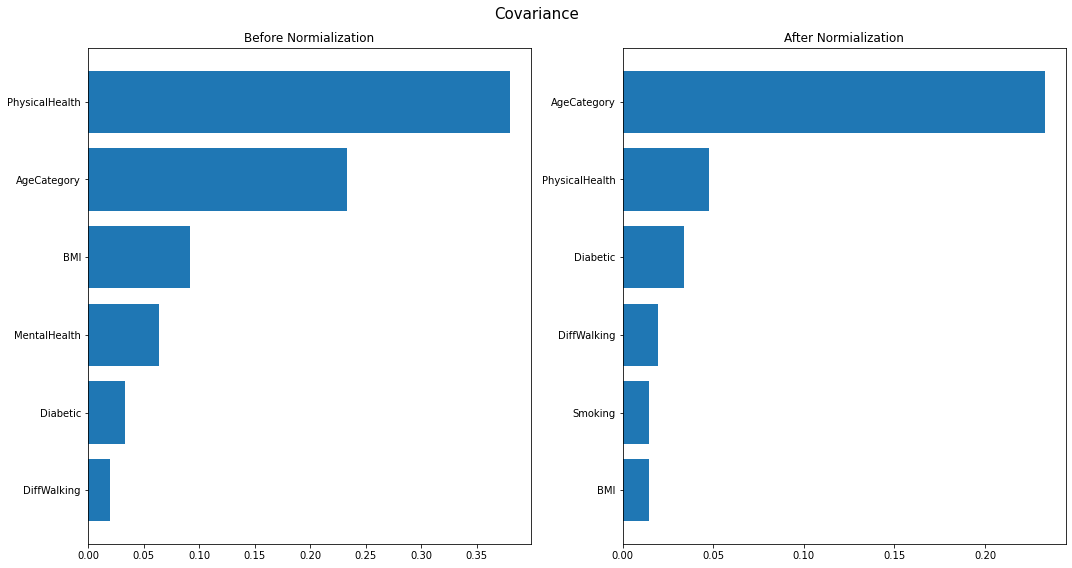

In [52]:
plot_bar_chart(unscaling_cov,scaling_cov,maintitle="Covariance")

The result in correlation not different after normalization but there is huge different in covariance. First the Physical health reduce from 0.3797 to 0.078269 which is huge gap but it still manage in top 6 in both case. Meanwhile Diabetic and DiffWalking are increasing from top 5,6 to 3,4. 
</br>From these information we can conclude features that most related to Heart Disease are: **AgeCategory, Physical Health, Diabetic, DiffWalking**. However, let look back to the pie charts in Binary data, we conclude in that chapter is **Stroke, DiffWalking, Physical Activity, Kidney Disease, Skin Cancer** affect most people in Heart Disease than people don't have Heart Disease. However, while **Stroke** and **DiffWalking** and **Kidney Disease** in top 6 correlation with Heart Disease, the other two have very low correlation, especially **Physical Activity** have negative correlation and covariance after normialization, **Skin Cancer** has covariance close to zero. We can add **Kidney Disease** and **Skin Cancer** into important features but we not sure about **Physical Activity** and **Skin Cancer** despite of most people have Heart Disease don't do Physical Activity and Skin Cancer than people who don't have Heart Disease. 
#### </br>In our conclusion, we have these important features: **AgeCategory, Physical Health, Diabetic, DiffWalking, Stroke and Kidney Disease**. As for, **Physical Activity** and **Skin Cancer** we can add into training data to see if it improve the accuracy or not.

# 1. 3. Age Category

In the correlation and covariance, we can see AgeCategory are the most highest (top 1 in both cases after normalization) especially has high covariance than the others, so we need to explore a bit more in AgeCategory to answer the question why it so related to Heart Disease

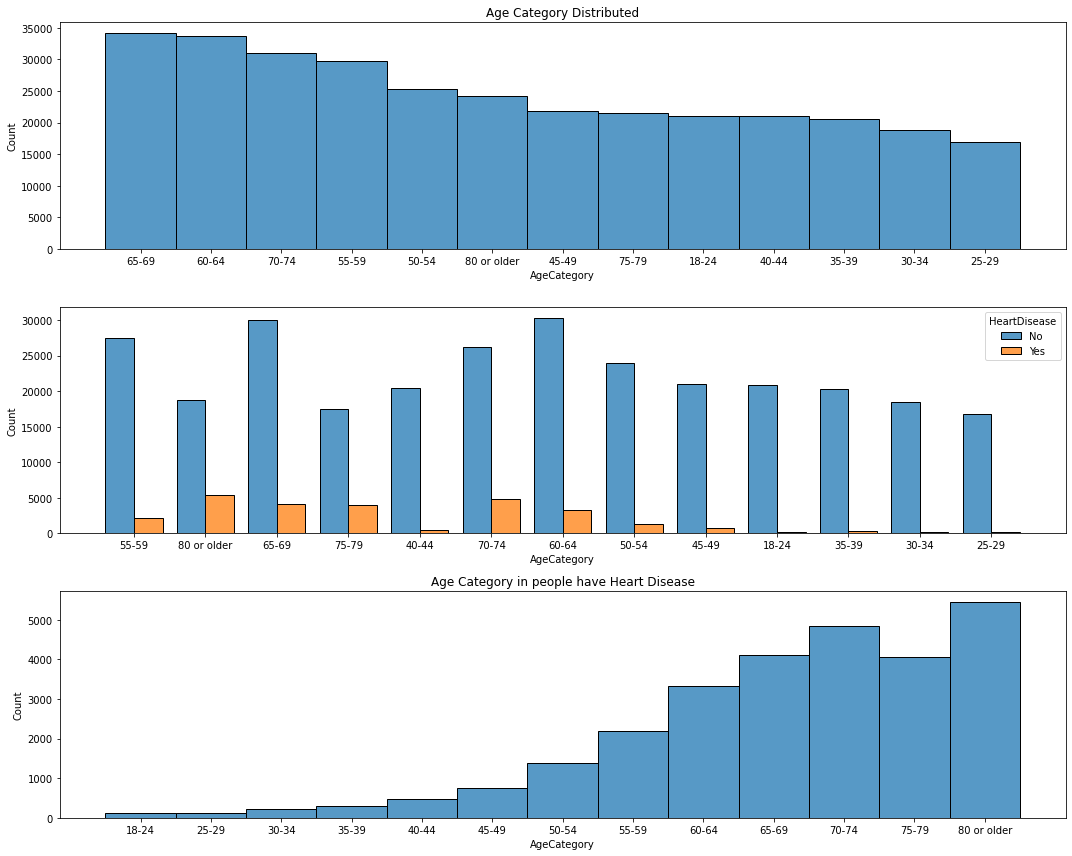

In [53]:
fig, axes = plt.subplots(3,1, figsize=(15,12))

i, r = pd.factorize(df_hd["AgeCategory"])
a = np.argsort(np.bincount(i)[i], kind='mergesort')[::-1]
sns.histplot(ax=axes[0],x=df_hd.iloc[a]["AgeCategory"])
axes[0].set_title("Age Category Distributed")

sns.histplot(ax=axes[1], data=df_hd, x="AgeCategory", hue="HeartDisease", multiple="dodge", shrink=.8)

sns.histplot(ax=axes[2], data=df_hd[df_hd.HeartDisease=="Yes"].sort_values(by="AgeCategory"), x="AgeCategory")
axes[2].set_title("Age Category in people have Heart Disease")

fig.tight_layout()
plt.show()

Most people in this dataset from around 60 to 80 or older but mostly from 60-69. Heart Disease people mostly are 70-74 and 80 or older and in Age Category Distributed figure,80 or older in top 6 and 70-74 in top 4. This create a question in us, whether the distributed age category in people who have Heart Disease was affected by the most distributed age category in total. We can consider that 80 or older does not affect by this because it is top 1 people's age who have heart disease but number of people in 80 or older only top 6 in the whole dataset. But,for 70-74, we can not so sure anymore. As for the solution, we can use **OneHotEncoder** to divide Age Category into 13 features and see which are correlated and covariance with Heart Disease most

In [54]:
age_cat = df_hd[["AgeCategory"]].sort_values(by="AgeCategory")

In [55]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
age_cat_encoder = onehot_encoder.fit_transform(age_cat)
age_cat_encoder = pd.DataFrame(age_cat_encoder, columns=age_cat.AgeCategory.unique())
age_cat_encoder = pd.merge(age_cat_encoder, df_cat_encoded["HeartDisease"],left_index=True, right_index=True)

In [56]:
age_cat_encoder.head(3)

,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 or older,HeartDisease
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
age_cor = age_cat_encoder.corr()["HeartDisease"].sort_values(ascending=False)[:8]
age_cov = age_cat_encoder.cov()["HeartDisease"].sort_values(ascending=False)[:8]

In [58]:
print("Correlation")
display(age_cor)
print("Covariance")
display(age_cov)

Correlation


HeartDisease    1.000000
30-34           0.014597
18-24           0.013113
45-49           0.012632
55-59           0.004153
65-69           0.003758
80 or older     0.002352
70-74           0.002339
Name: HeartDisease, dtype: float64

Covariance


HeartDisease    0.078269
30-34           0.000959
18-24           0.000910
45-49           0.000891
55-59           0.000338
65-69           0.000325
70-74           0.000194
80 or older     0.000174
Name: HeartDisease, dtype: float64

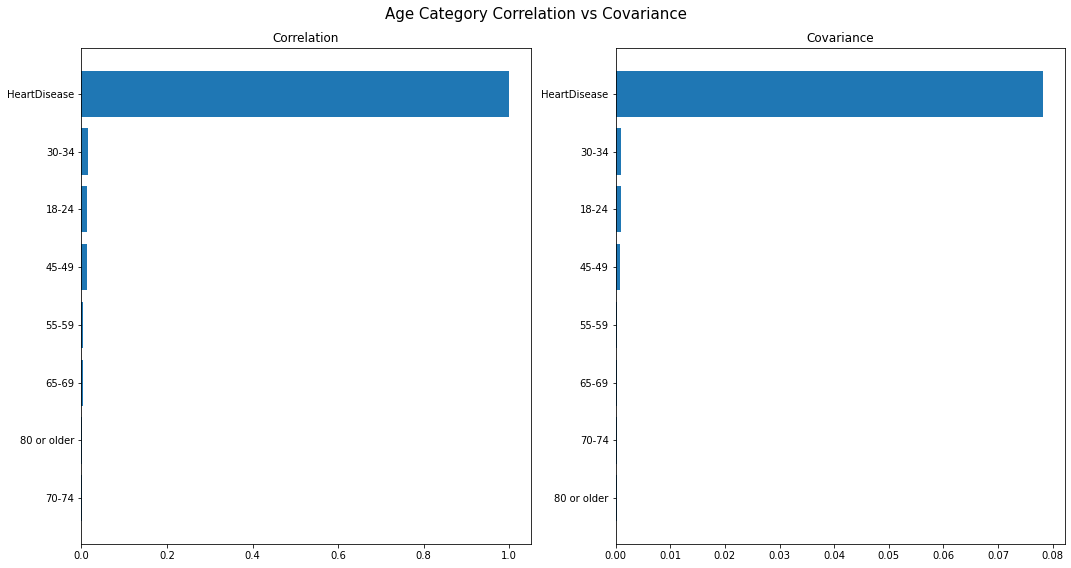

In [59]:
plot_bar_chart(age_cor,age_cov, maintitle="Age Category Correlation vs Covariance", title1="Correlation",title2="Covariance")

The result seem to opposite from what we learn from the Age Category histogram. Suppose the 70-74 and 80 or older are most affect to Heart Disease in Age Category histogram. But these two have very low correlation and covariance, almost near zero which means no correlation at all. The opposite for 18-24, 30-34 and 45-49, especially number of people have 30-34 age is small in the dataset (As we see it in top 13 in age category distributed chart) but it get the highest correlation and covariance. Does this make 30-34 important than the other age or 70-74 and 80 still most affect Heart Disease but have no correlation with it?

# 1. 4. Scatter plot

In [60]:
# We want to create new dataframe that already scale and convert categorical to numeric
df_hd_new = df_numeric_scaler.copy()

In [61]:
df_hd_new.head(3)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,1.0,0.0,1.0,-1.844750,-0.046751,3.281069,-1.460354
1,0.0,0.0,0.0,1.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,-1.256338,-0.424070,-0.490039,-0.067601
2,0.0,1.0,0.0,0.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0,-0.274603,2.091388,3.281069,0.628776


In [62]:
df_hd_new.describe()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,3.197950e+05,3.197950e+05,3.197950e+05,3.197950e+05
mean,0.085595,0.412477,0.068097,0.037740,0.138870,0.475273,6.514536,4.396742,0.300386,0.775362,2.220904,0.134061,0.036833,0.093244,7.247738e-16,5.814632e-17,-4.332645e-17,1.727170e-16
std,0.279766,0.492281,0.251912,0.190567,0.345812,0.499389,3.564759,1.212208,0.716480,0.417344,1.534647,0.340718,0.188352,0.290775,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.565319e+00,-4.240698e-01,-4.900386e-01,-4.245859e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-6.757926e-01,-4.240698e-01,-4.900386e-01,-7.639770e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,-1.550322e-01,-4.240698e-01,-4.900386e-01,-6.760053e-02
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,4.868719e-01,-1.725240e-01,-1.129278e-01,6.287760e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.046628e+01,3.349118e+00,3.281069e+00,1.177080e+01


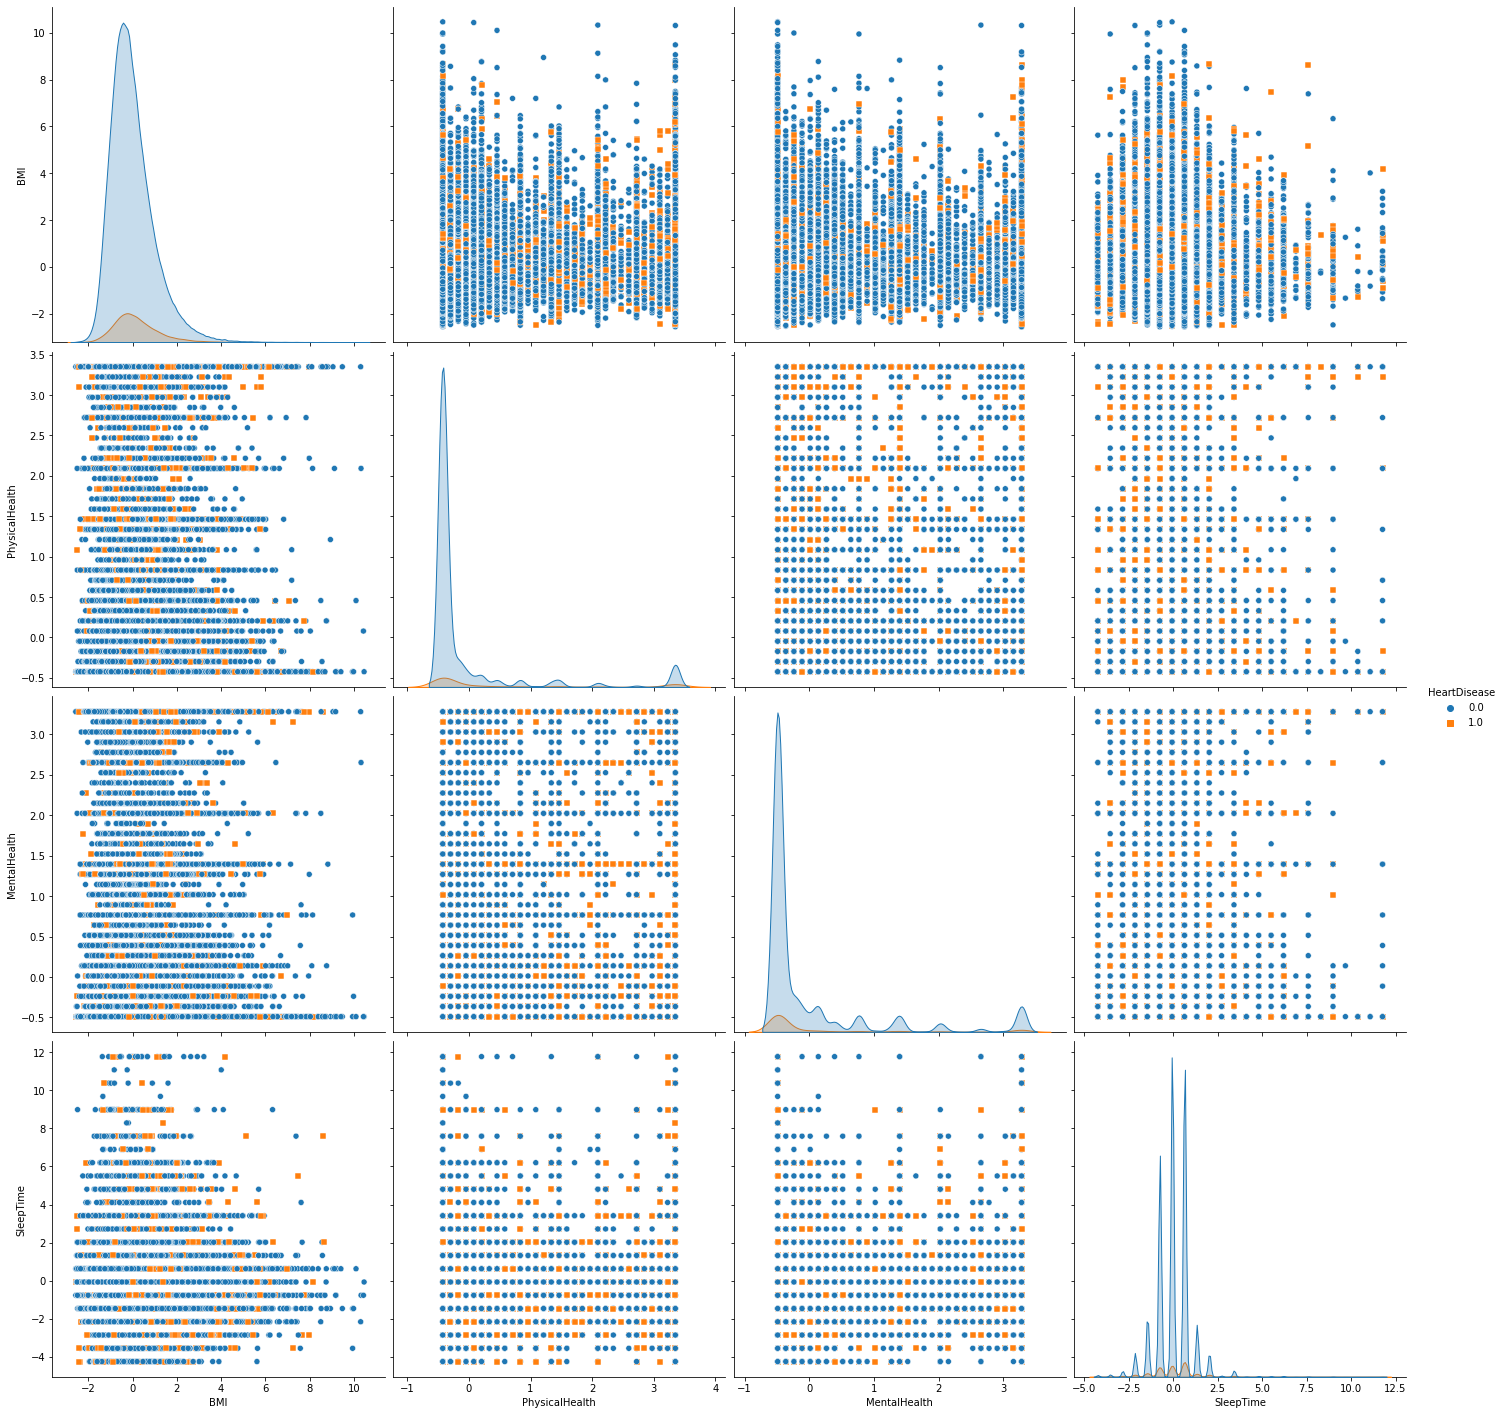

In [63]:
sns.pairplot(df_hd_new[["HeartDisease","BMI","PhysicalHealth", "MentalHealth", "SleepTime"]], hue="HeartDisease", markers=["o", "s"], height=5)
plt.show()

In [64]:
def draw_scatter_3D(feature1, feature2, feature3):
    fig = plt.figure(figsize=(15,8))
    axes = plt.axes(projection='3d')

    axes.scatter3D(df_hd_new[feature1], df_hd_new[feature2], df_hd_new[feature3], c=df_hd_new["HeartDisease"])

    axes.set_xlabel(feature1)
    axes.set_ylabel(feature2)
    axes.set_zlabel(feature3)

    fig.tight_layout()
    plt.show()

We also plot with 3D dimension to clearly see the distributed of Heart Disease. We choose SleepTime, BMI and Physical Health because these less correlated each other

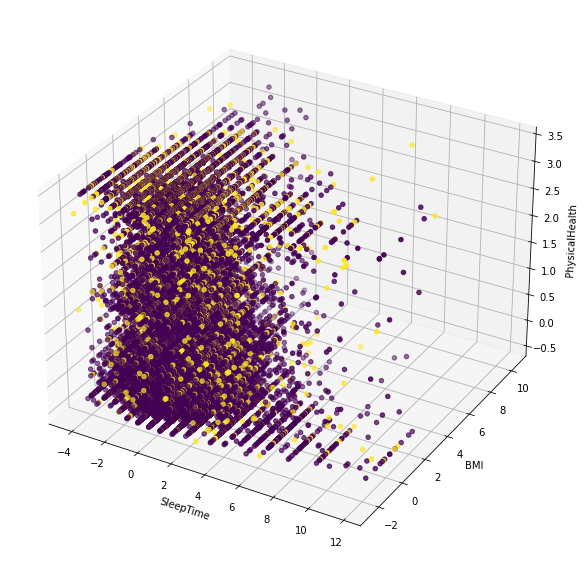

In [65]:
draw_scatter_3D("SleepTime", "BMI", "PhysicalHealth")

When we draw the scatter plot both in 2D and 3D, we want to add hue is Heart Disease to check whether this data suitable for classification. As a result, we can not clearly see the divided area for Heart Disease and No Heart Disease in these scatter plot. No matter how the good algorithm are, if Heart Disease points are mixing with No Heart Disease, the algorithm cannot predict a line or zoning area between Heart Disease and No Heart Disease.

# 1. 5. Detect outlier

For outlier detect, we draw Boxplot instead of Violin plot because while Violin plot show nuances in distribution, Boxplot show clearly outliers in the data. We try draw boxplot with our category important features meantion above: **AgeCategory, Diabetic, Diff Walking, Stroke, Kidney Disease**

In [66]:
def draw_box_plot(x_axis_feature):
    position_axes = [(0,0), (0,1), (1,0), (1,1)]
    fig, axes = plt.subplots(2,2, figsize=(10,6))
    for position, feature in zip(position_axes, num_features):
        sns.boxplot(ax= axes[position],data=df_hd_new, x=x_axis_feature, y=feature)
        
    fig.suptitle(x_axis_feature, fontsize=15)
    fig.tight_layout()
    
    plt.show()

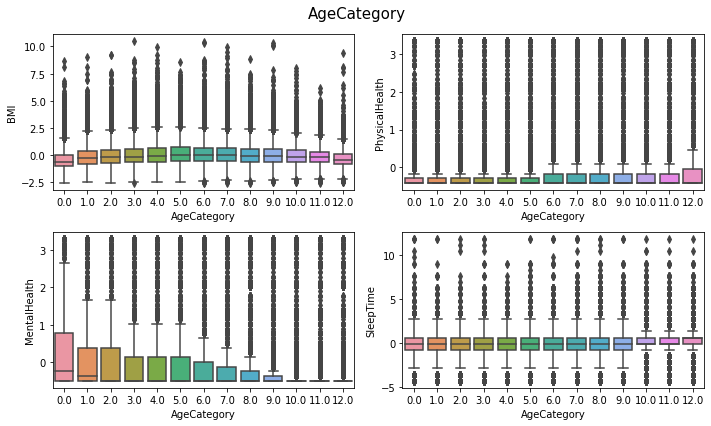

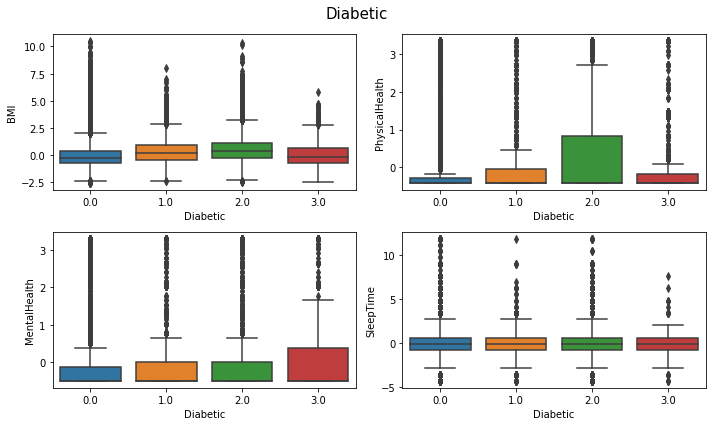

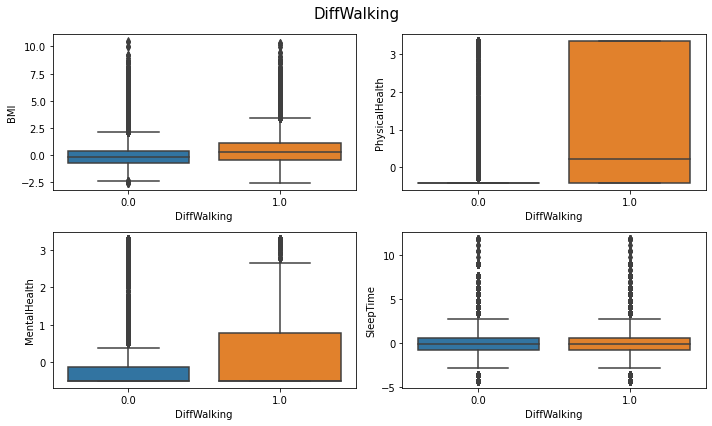

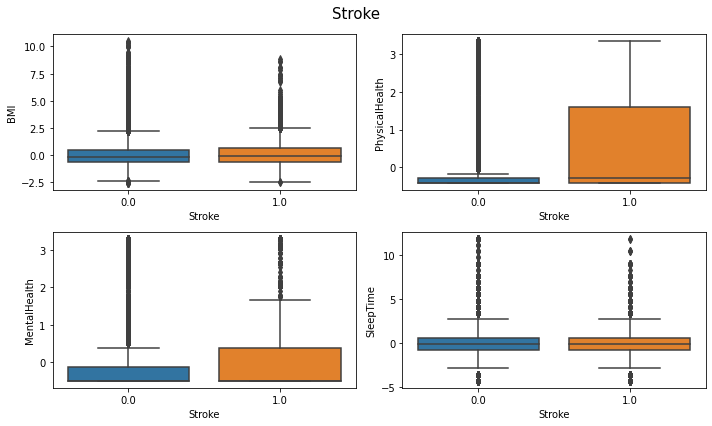

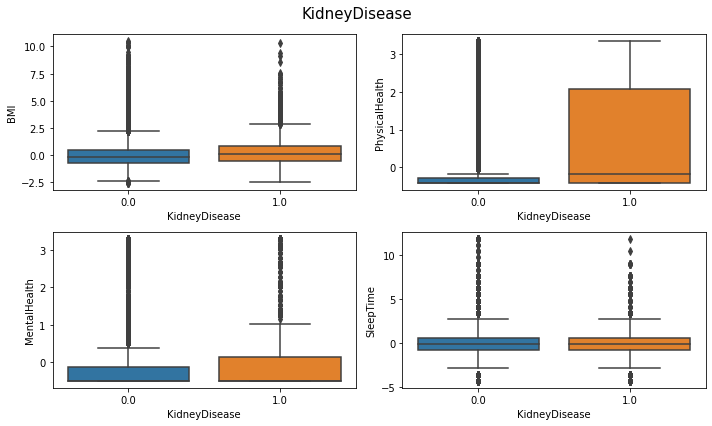

In [67]:
draw_box_plot("AgeCategory")
draw_box_plot("Diabetic")
draw_box_plot("DiffWalking")
draw_box_plot("Stroke")
draw_box_plot("KidneyDisease")    

We can clearly see many outliers above the upper bound and lower bound, especially **Mental health** and **Physical Health** in **Age Category**, the same for other category features.

# 1. 6. Conclusion

In summary, we see Heart Disease and No Heart Disease are overlapping each other in the scatter plot, both in 2D and 3D. We also see the correlation of each features to the Heart Disease are near to zero, which mean no correlation at all, for the highest correlation feature is AgeCategory, it has almost 0.23, which still a bad positive correlation, meanwhile for the lowest correlation is -0.1 still very small to call negative correlation. Furthermore, there are many outliers in numeric with categorical features, with removing outliers can be damage the quantity of dataset as there are not enough training data for the model. Finally, the data is unbalanced, only 8% in dataset is Heart Disease, this will make accuracy is misleading, because it predict 100% people get No Heart Disease but 0% people get Heart Disease(the model get high accuracy because most people are No Heart Disease)
#### </br>For our conclusion, this dataset does not suitable for classification in Heart Disease cause data overlapping, unbalanced data, low correlation and a lot of outliers
</br>Our next step is try to apply this data into the model to see the accuracy will help us more sure about our above conclusion are not.